In [1]:
import os
import sys
import pathlib
import pickle as pkl
import json

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

import torch
import torchvision

from torch.utils.data import DataLoader, Subset

from datasets import deep_fashion
from arch import backbones, heads, models

from tqdm import tqdm

import utils.time

from time import time
from datetime import datetime

import pprint

In [2]:
training_name_str_list = ["resnet50_ret_init_{:03}".format(idx) for idx in range(9)]

In [3]:
def load_experiment_data(
        experiment_data_filename
        ):

    with open(experiment_data_filename, 'r') as experiment_data_file:
        experiment_data = json.load(experiment_data_file)

    return experiment_data

---

In [4]:
train_data_list = []

for training_name_str in training_name_str_list:

    results_dir = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", training_name_str)

    train_data_filename = "experiment_data.json"
    train_data_full_filename = os.path.join(results_dir, train_data_filename)

    train_data = load_experiment_data(train_data_full_filename)

    train_data_list.append(train_data)

In [5]:
pprint.pprint(train_data_list[4]["results"])

{'stage_1': {'finished': True,
             'mean_train_loss_list': [0.27429061546687733,
                                      0.21602361791242342,
                                      0.185945449054714,
                                      0.16744861024347,
                                      0.15472318606216853,
                                      0.1452689078998774,
                                      0.13784964230428415,
                                      0.13181614202261935,
                                      0.126749494077898,
                                      0.12241113061404679,
                                      0.11865425638894307,
                                      0.11535892240800806,
                                      0.11246526132022483,
                                      0.10988972306743648,
                                      0.1075719407249543,
                                      0.10547079425742369,
                                  

---

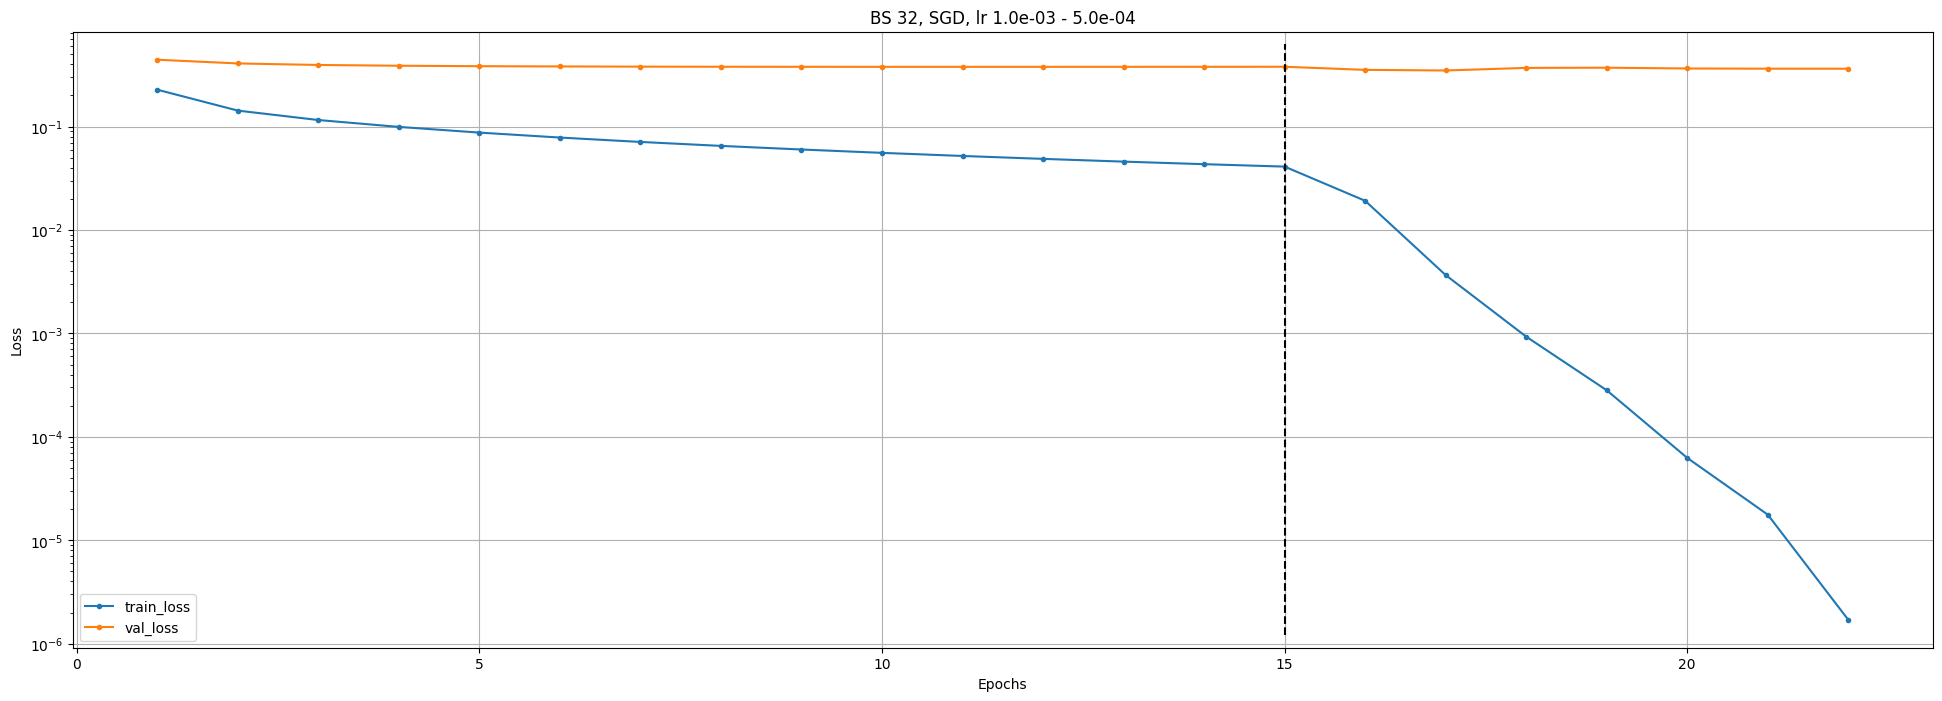

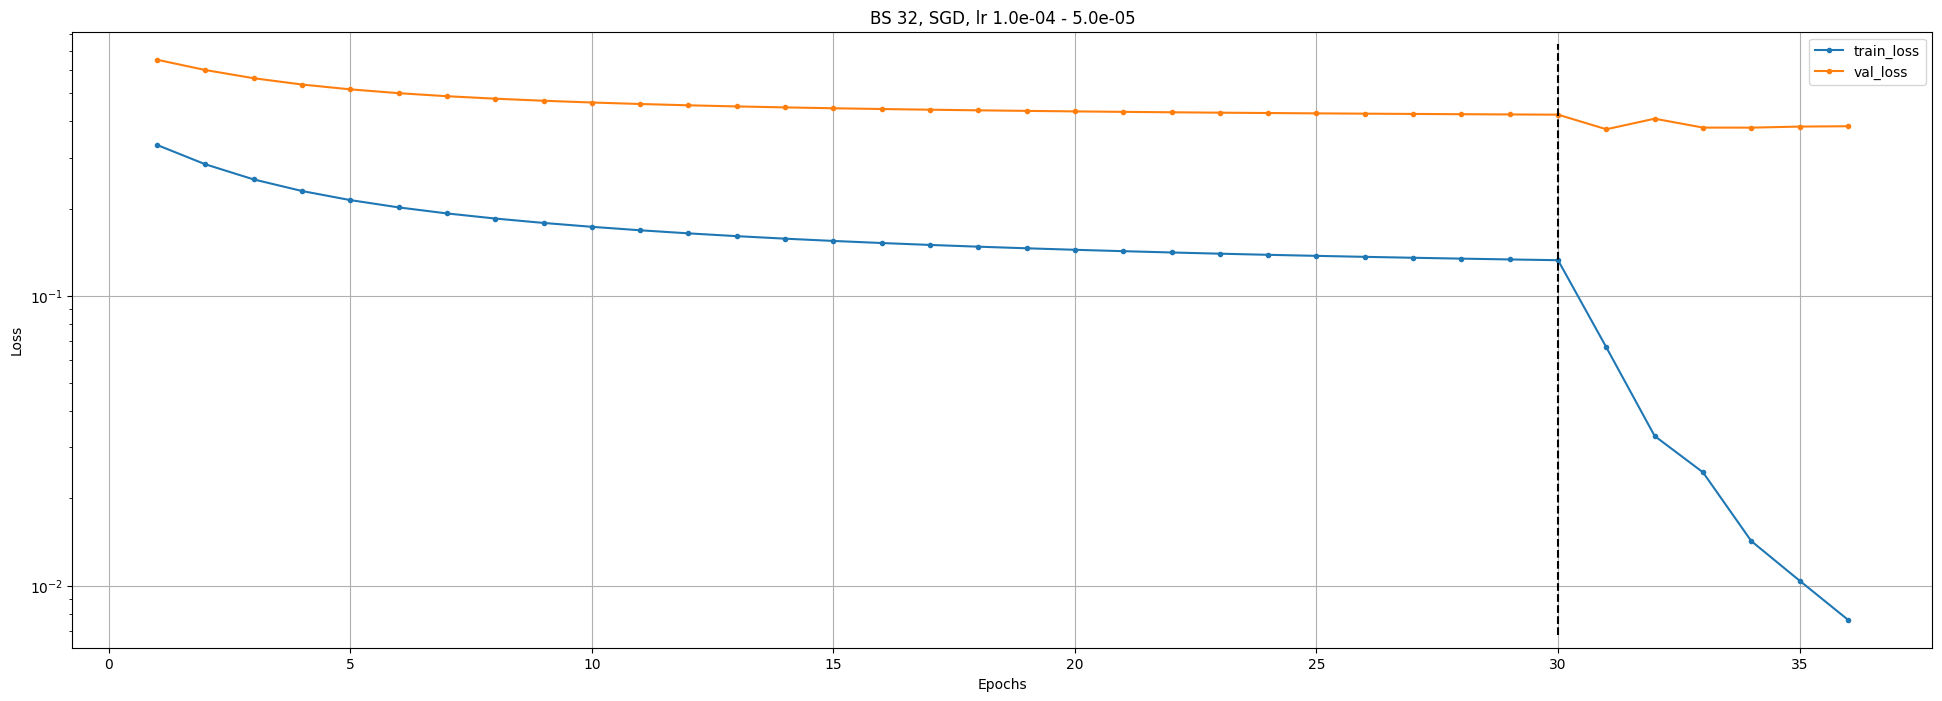

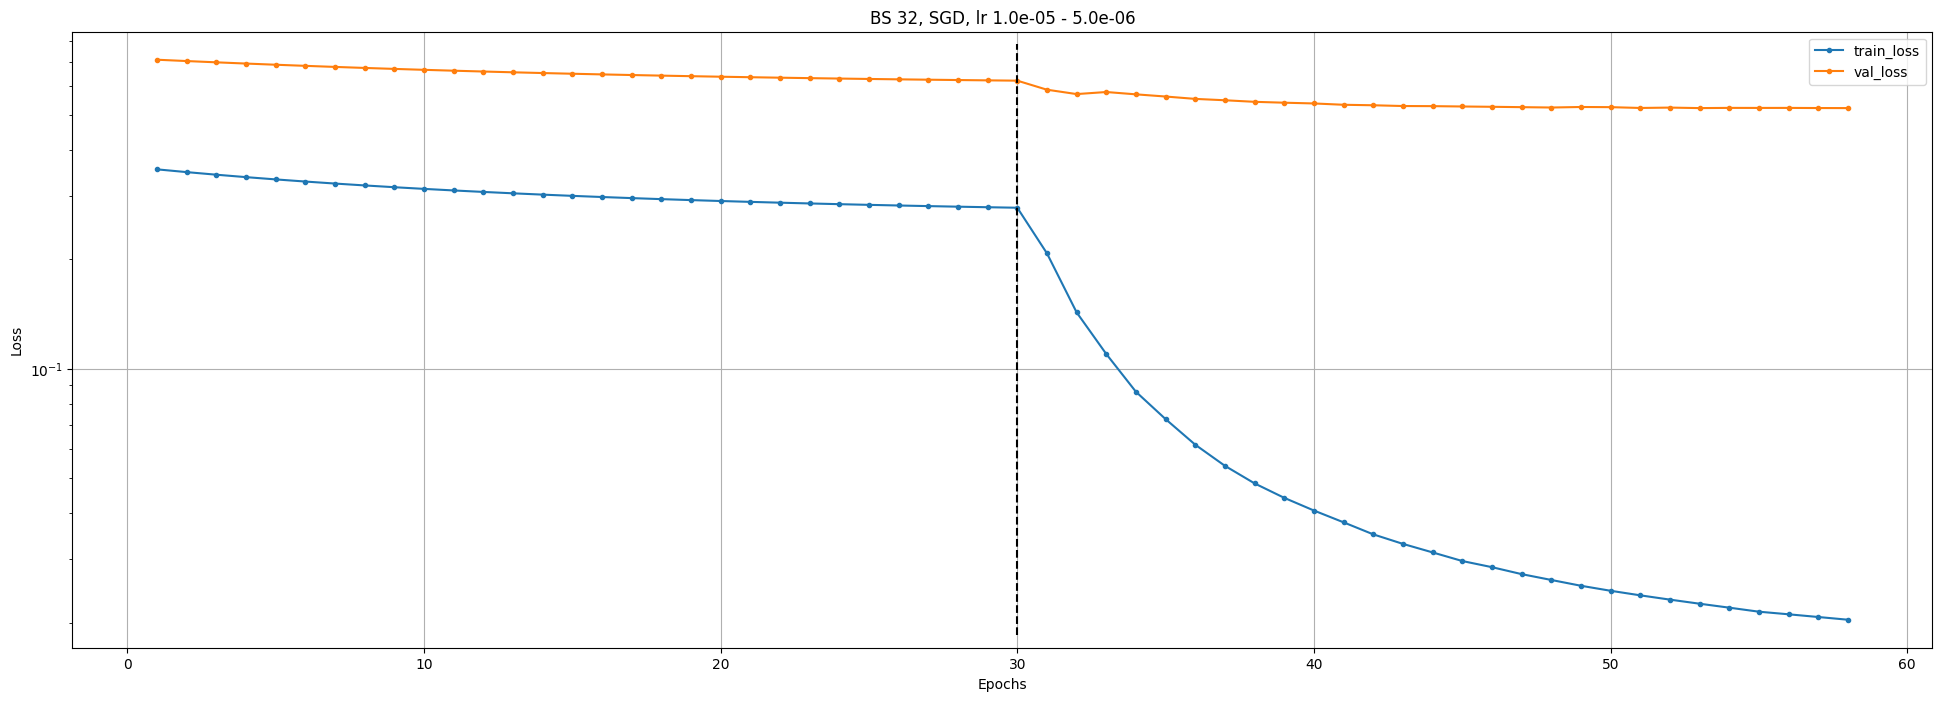

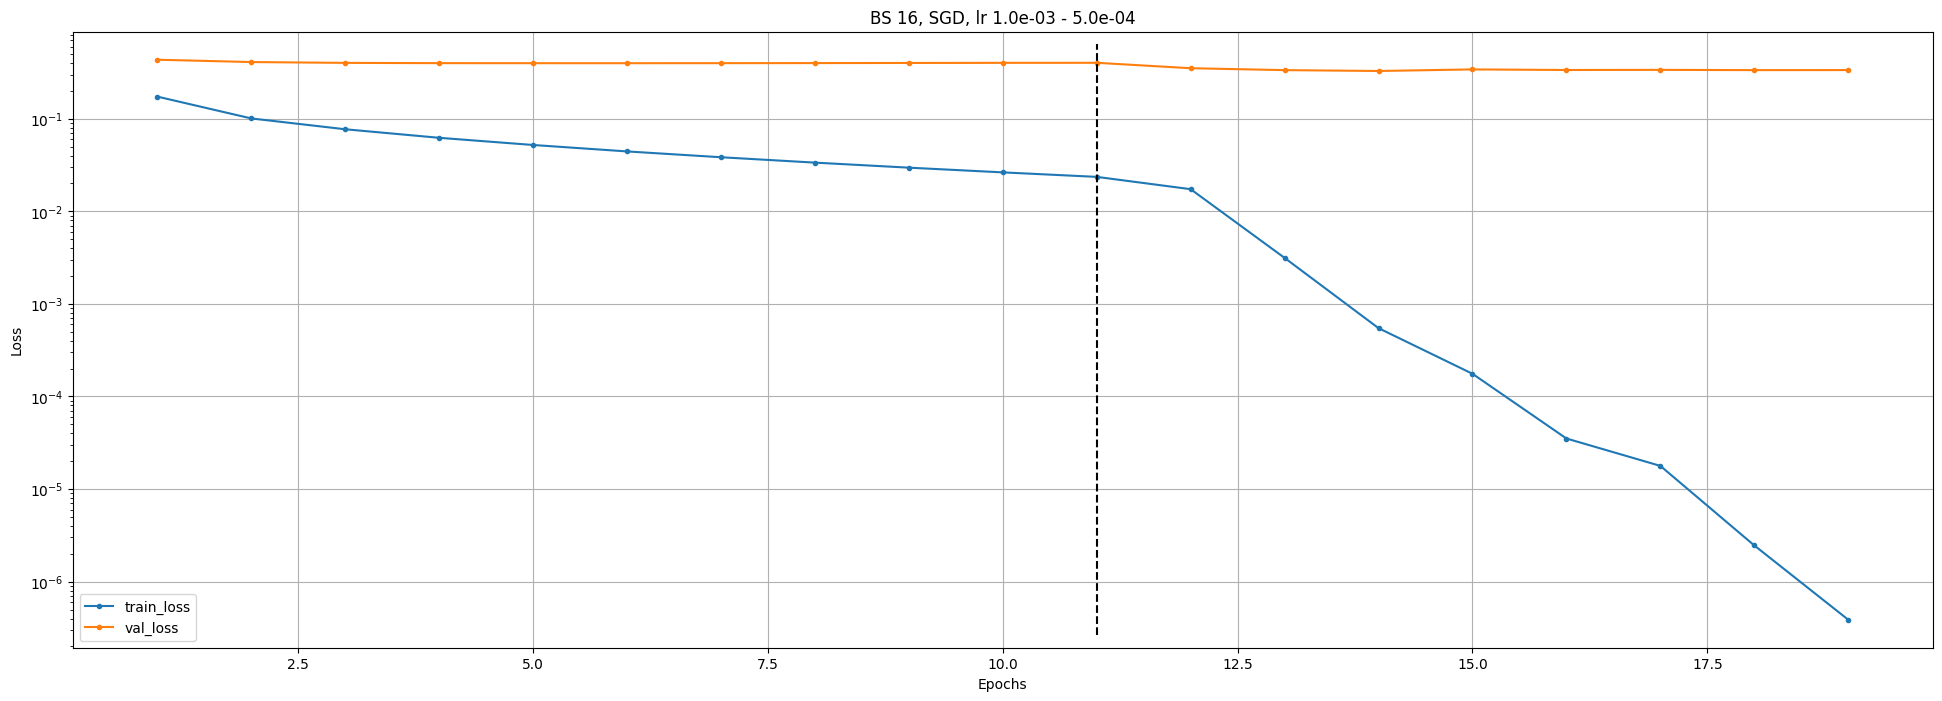

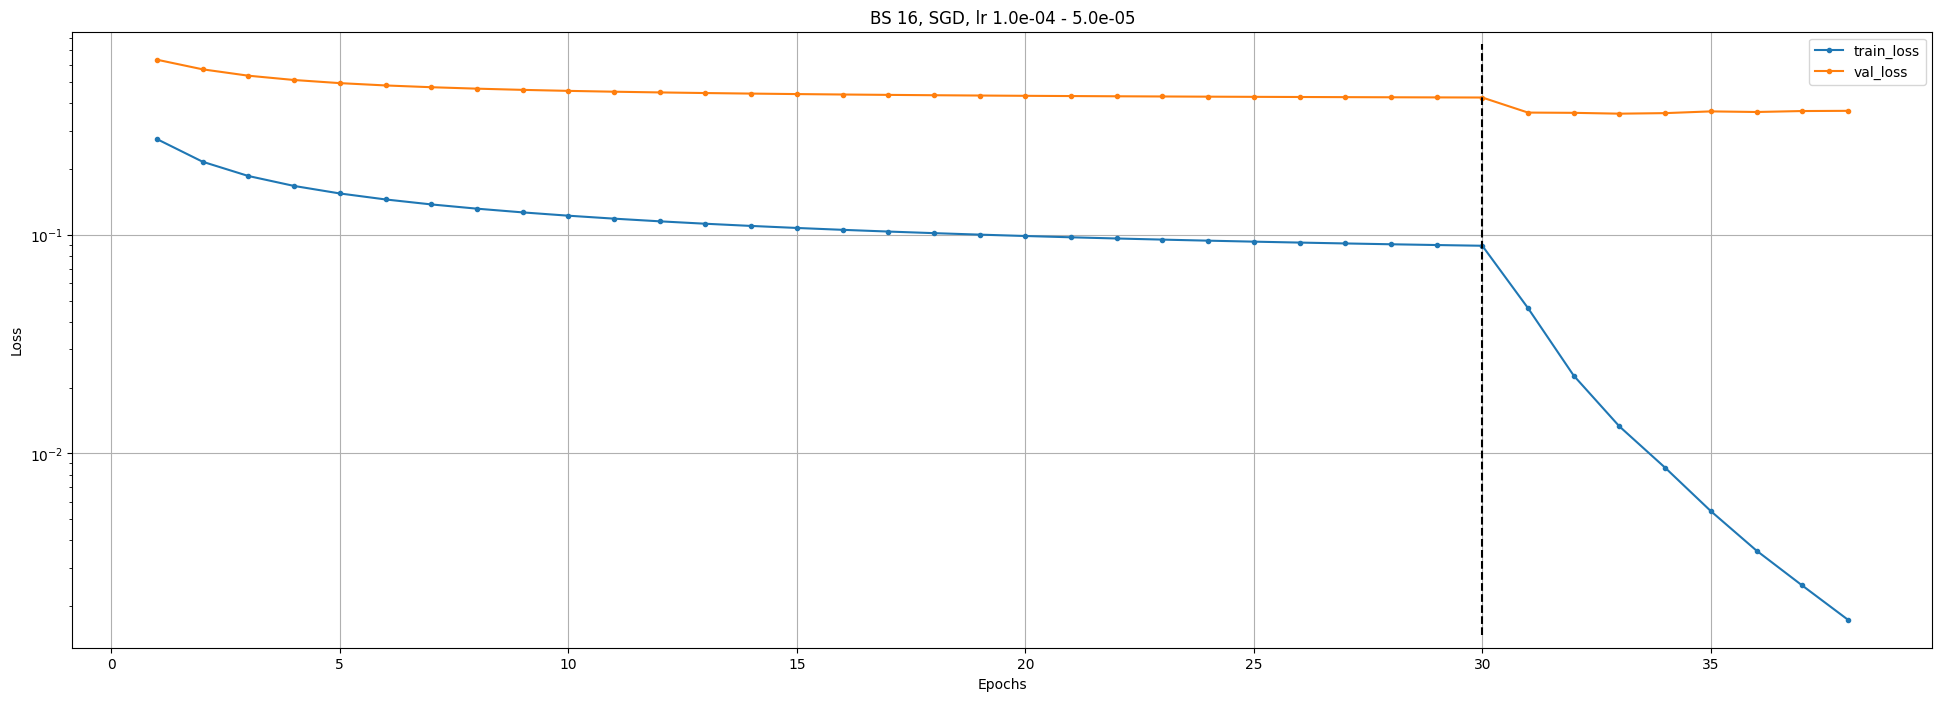

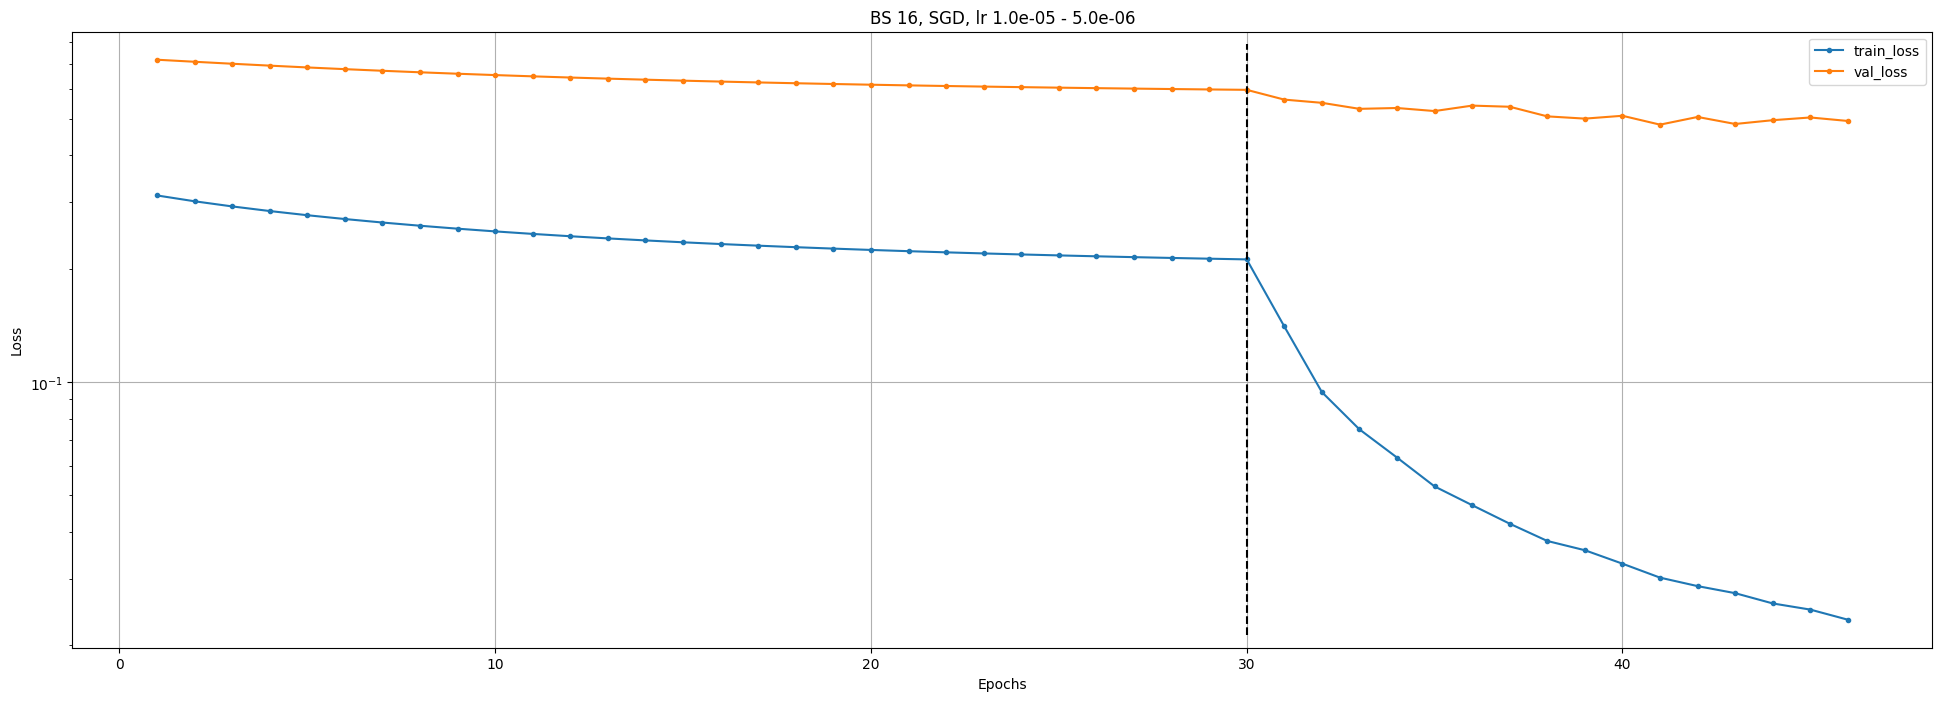

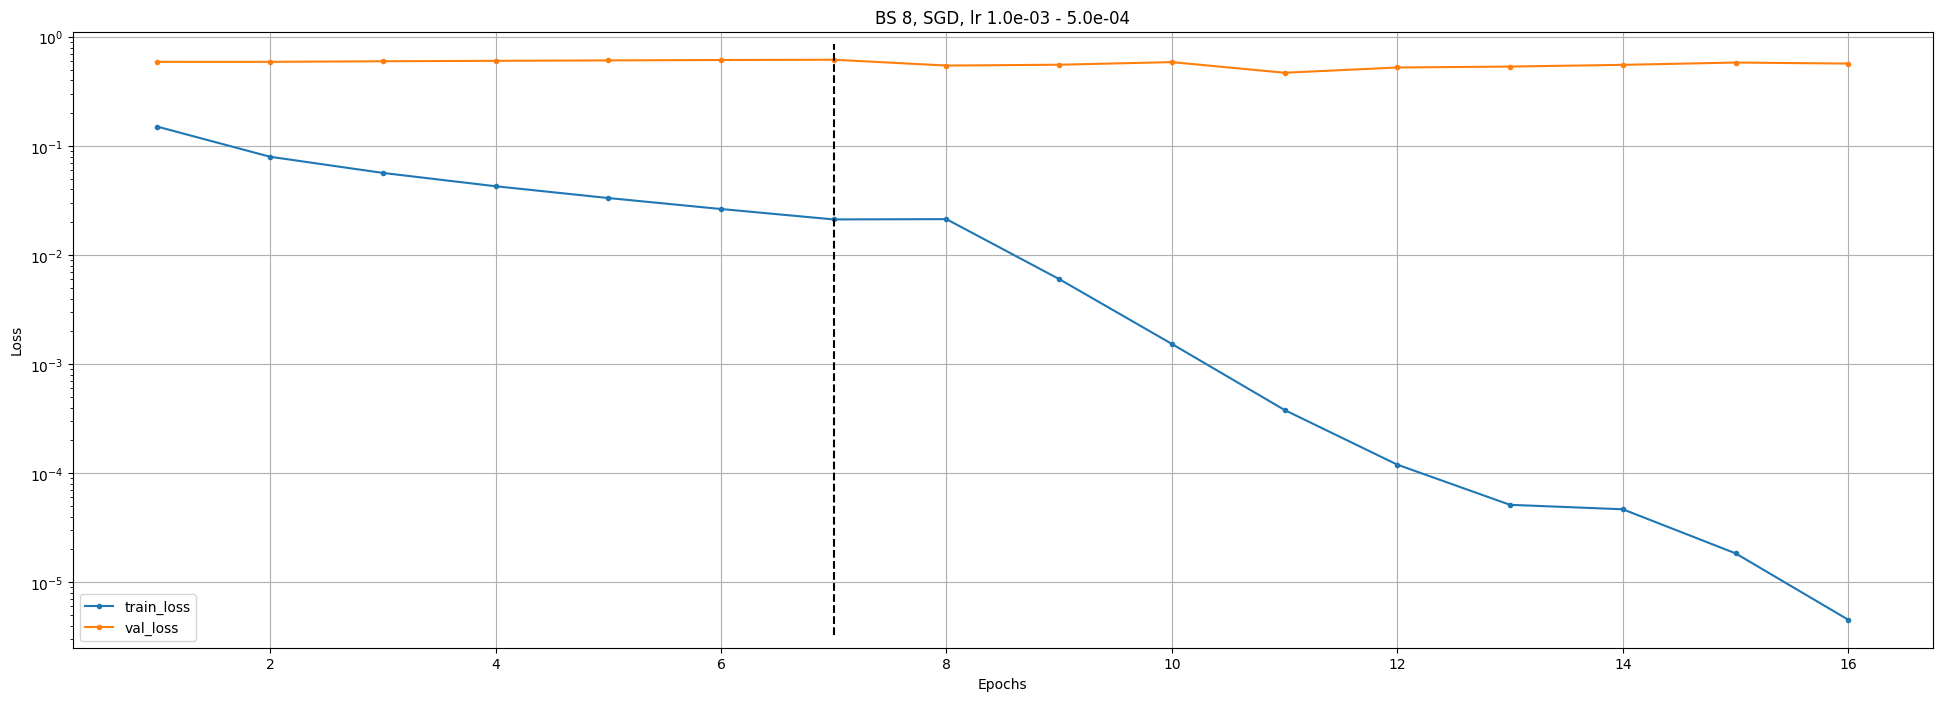

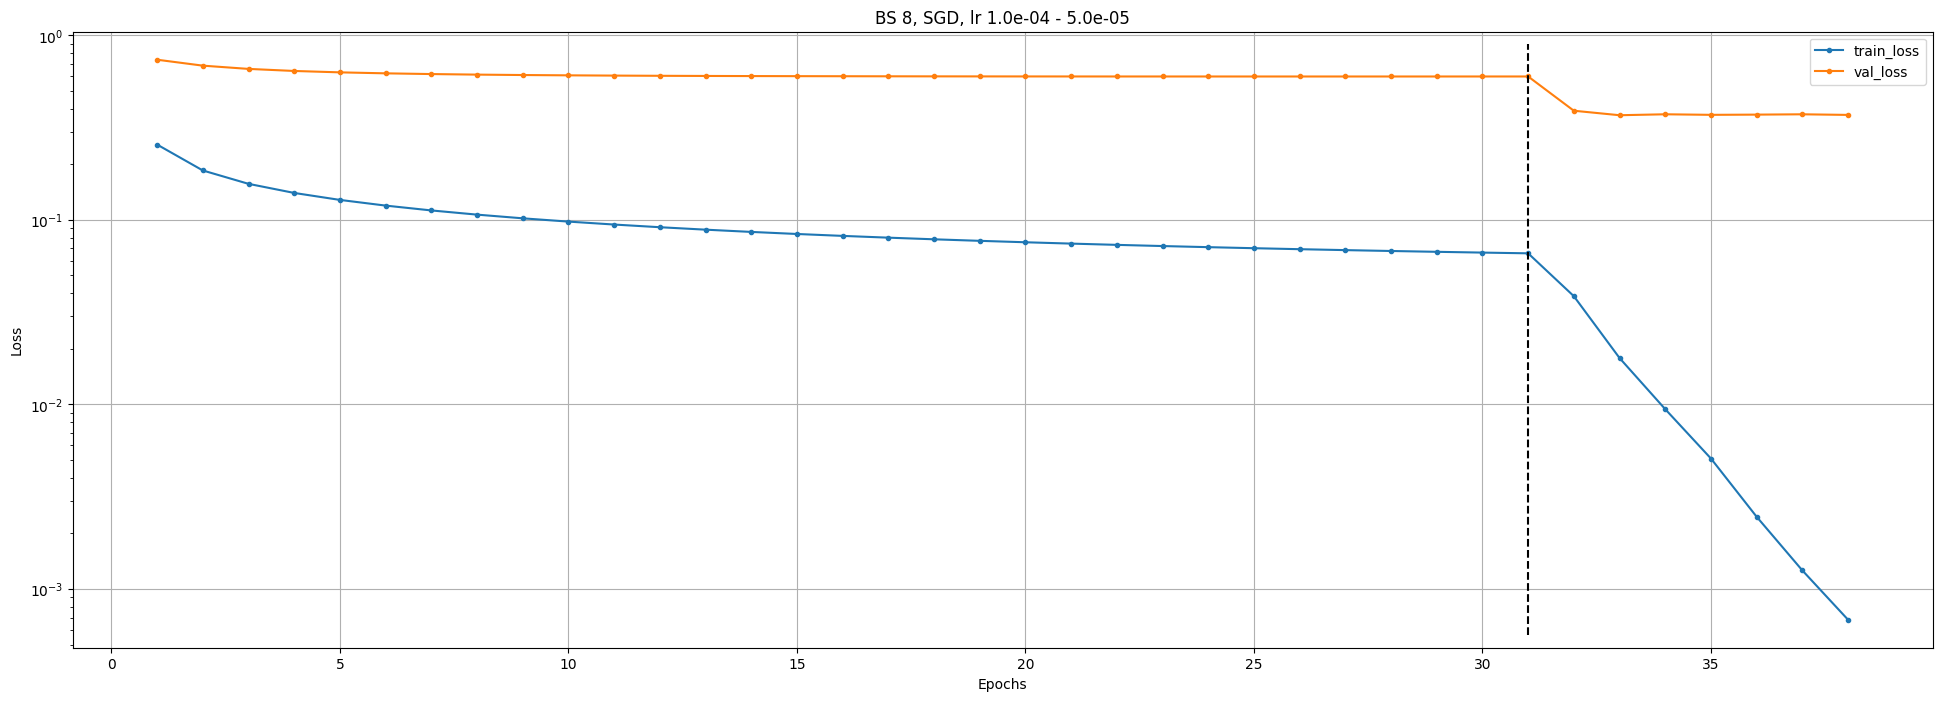

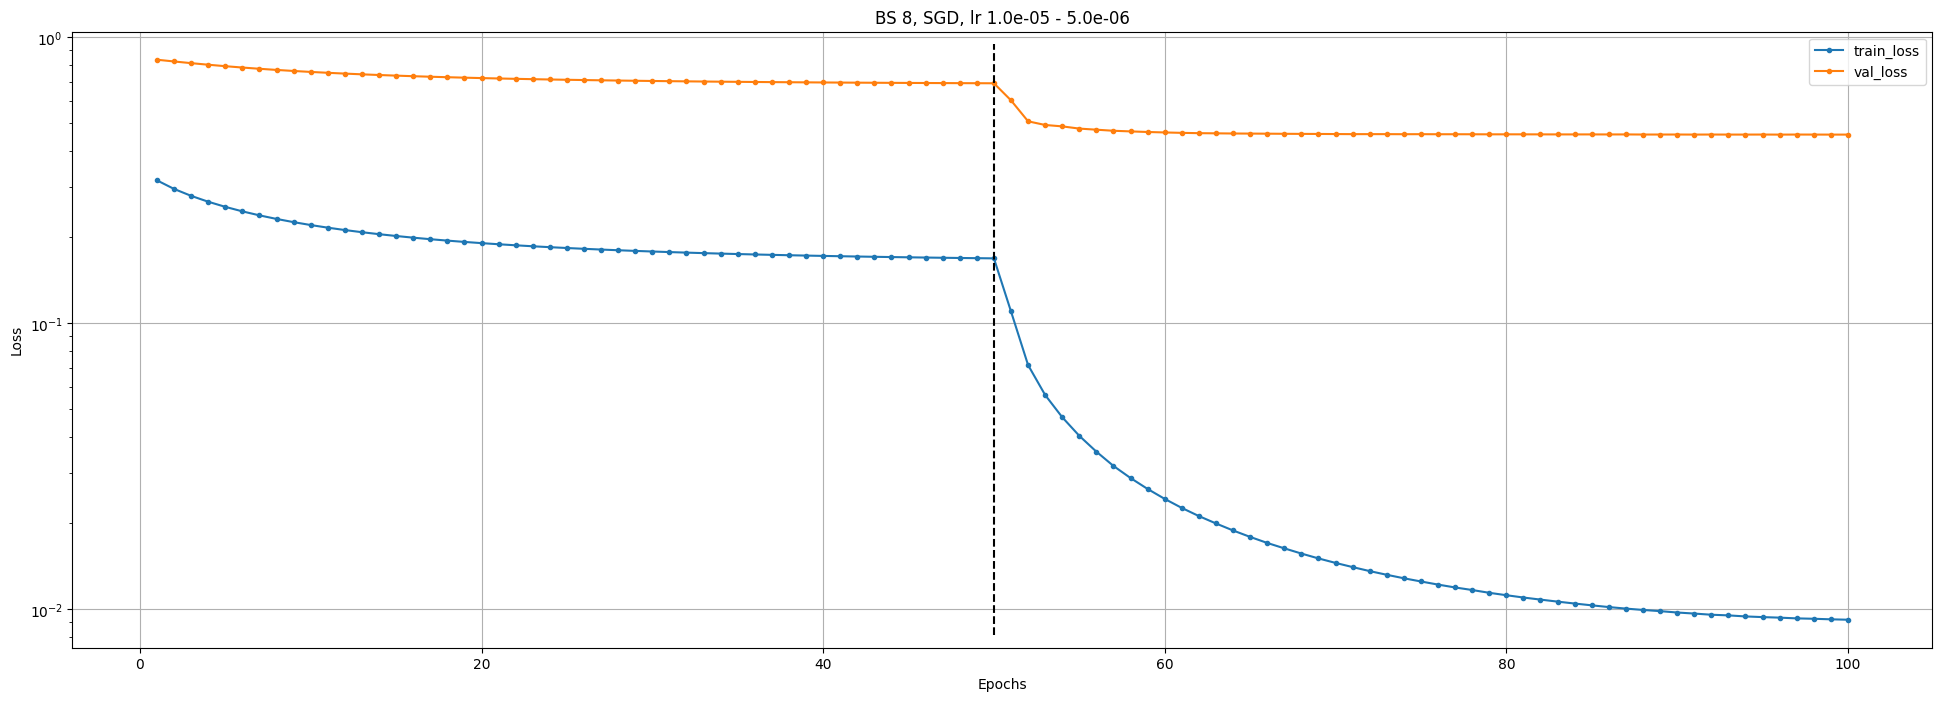

In [20]:
for train_data_idx, train_data in enumerate(train_data_list):

    fig, ax = plt.subplots(figsize=(24, 8))

    exp_name = "BS {:d}, {:s}, lr {:.1e} - {:.1e}".format(
        train_data["settings"]["data_loading"]["batch_size"],
        train_data["settings"]["stage_1"]["optimizer"]["class"],
        train_data["settings"]["stage_1"]["optimizer"]["lr"],
        train_data["settings"]["stage_2"]["optimizer"]["lr"]
    )

    mean_train_loss_list =\
        train_data["results"]["stage_1"]["mean_train_loss_list"] +\
        train_data["results"]["stage_2"]["mean_train_loss_list"]

    mean_val_loss_list =\
        train_data["results"]["stage_1"]["mean_val_loss_list"] +\
        train_data["results"]["stage_2"]["mean_val_loss_list"]
    
    stage_1_epochs = train_data["results"]["stage_1"]["num_epochs"]

    ax.plot(range(1, len(mean_train_loss_list) + 1), mean_train_loss_list, label="train_loss", marker=".")
    ax.plot(range(1, len(mean_val_loss_list) + 1), mean_val_loss_list, label="val_loss", marker=".")

    ax.axvline(stage_1_epochs, ymin=0.02, ymax=0.98, color="black", linestyle="--")

    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")

    ax.set_yscale("log")

    ax.grid()
    ax.legend()

    ax.set_title(exp_name)

    plt.show()

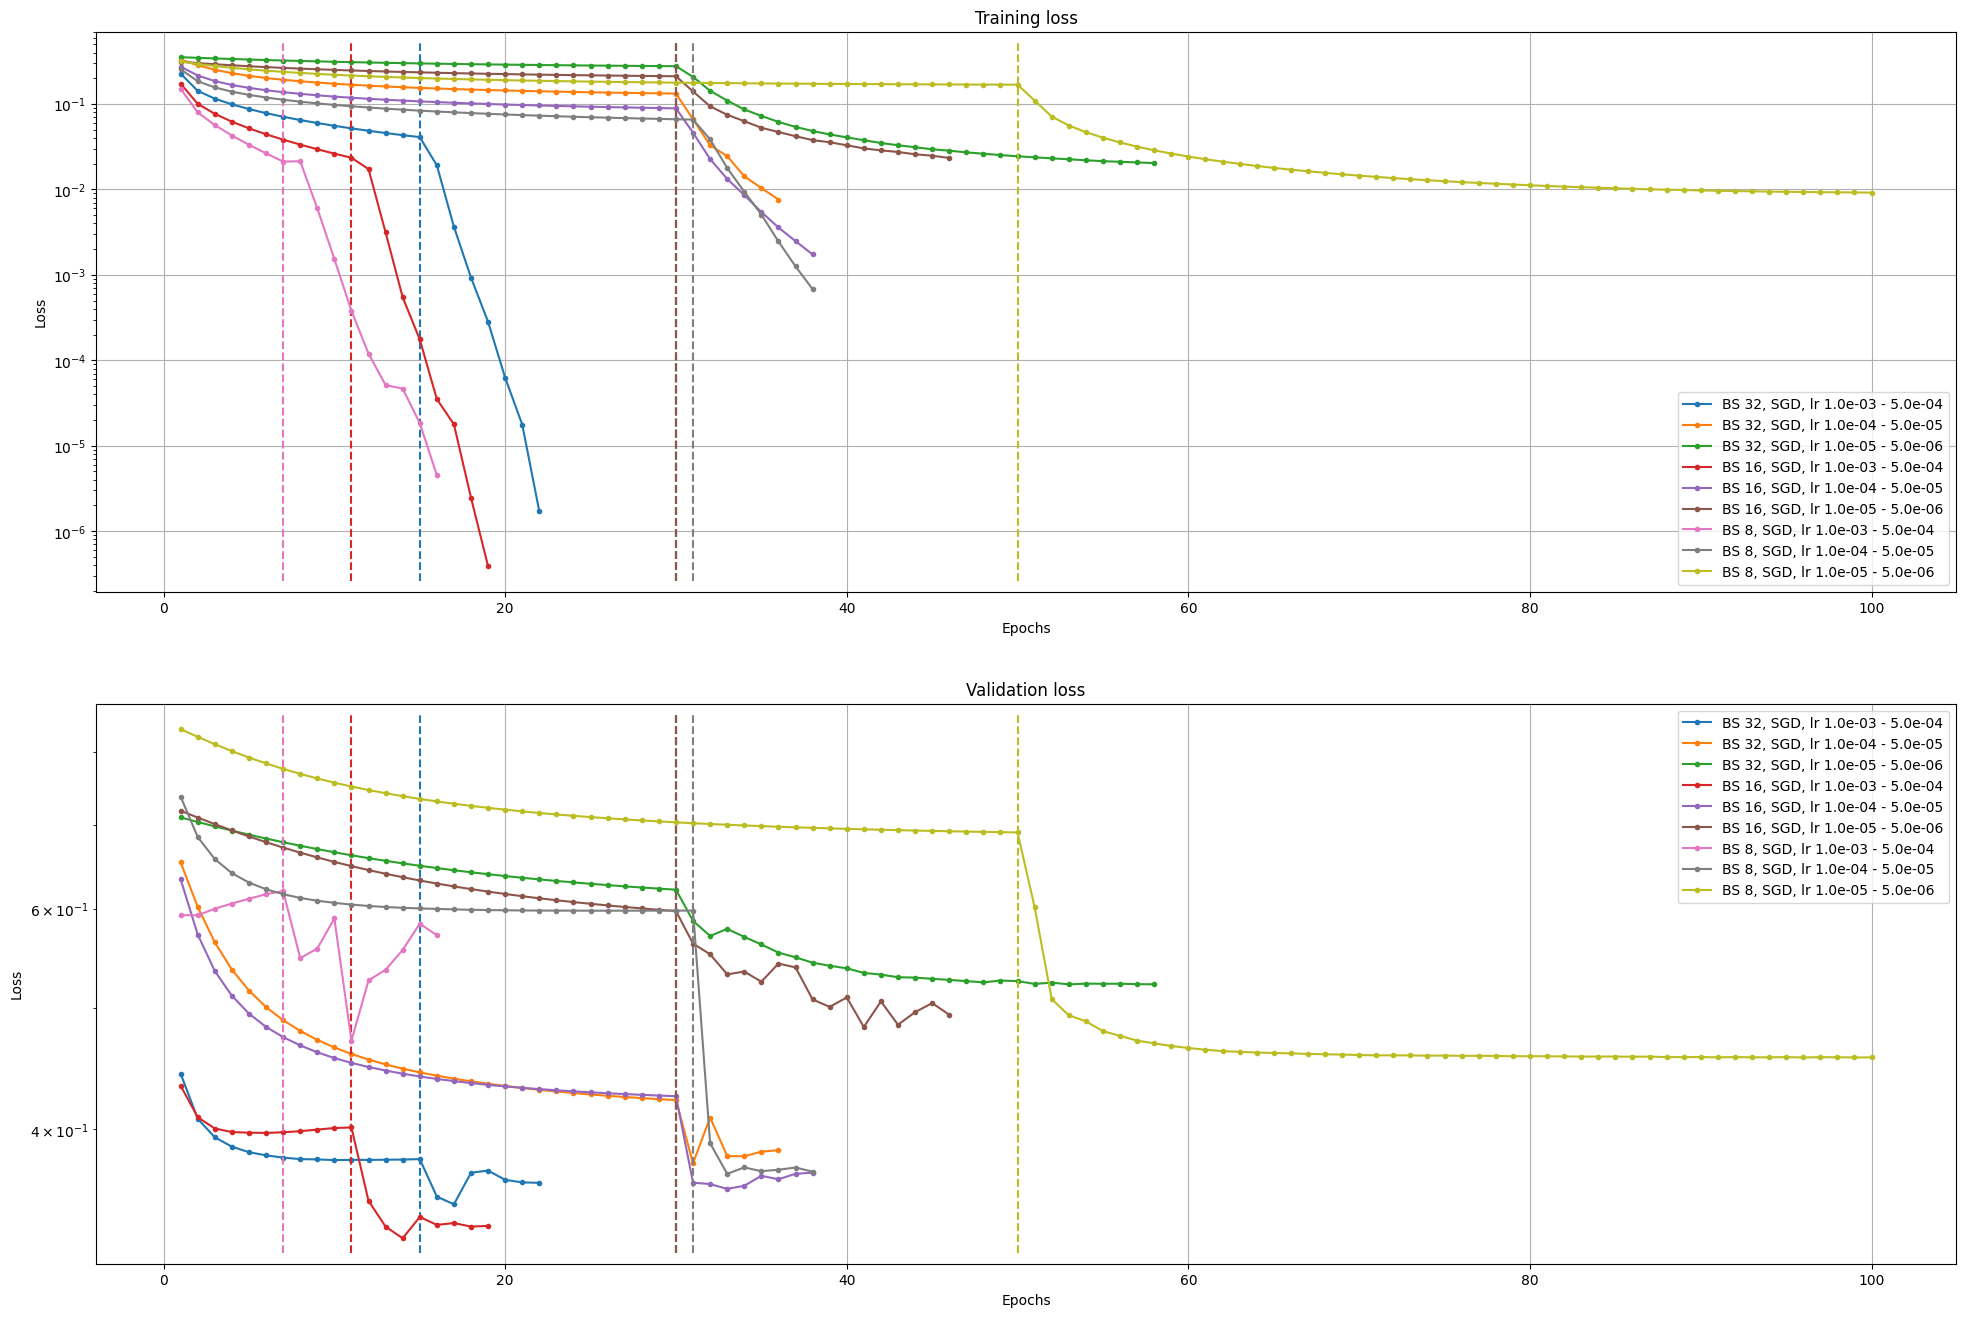

In [6]:
fig, axs = plt.subplots(figsize=(24, 16), nrows=2)

cmap = mpl.colormaps["tab10"]
color_list = [cmap(x) for x in np.linspace(0, 1, 10)]

for train_data_idx, train_data in enumerate(train_data_list):

    exp_name = "BS {:d}, {:s}, lr {:.1e} - {:.1e}".format(
        train_data["settings"]["data_loading"]["batch_size"],
        train_data["settings"]["stage_1"]["optimizer"]["class"],
        train_data["settings"]["stage_1"]["optimizer"]["lr"],
        train_data["settings"]["stage_2"]["optimizer"]["lr"]
    )

    mean_train_loss_list =\
        train_data["results"]["stage_1"]["mean_train_loss_list"] +\
        train_data["results"]["stage_2"]["mean_train_loss_list"]

    mean_val_loss_list =\
        train_data["results"]["stage_1"]["mean_val_loss_list"] +\
        train_data["results"]["stage_2"]["mean_val_loss_list"]
    
    stage_1_epochs = train_data["results"]["stage_1"]["num_epochs"]

    color = color_list[train_data_idx]
    #color = color_list[0] if train_data["settings"]["data_loading"]["batch_size"] == 32 else color_list[1]
    #color = color_list[0] if train_data["settings"]["stage_1"]["optimizer"]["class"] == "Adam" else color_list[1]
    #color = color_list[0] if train_data["settings"]["stage_1"]["optimizer"]["lr"] == 1e-3 else color_list[1]

    axs[0].plot(range(1, len(mean_train_loss_list) + 1), mean_train_loss_list, label=exp_name, color=color, marker=".")
    axs[1].plot(range(1, len(mean_val_loss_list) + 1), mean_val_loss_list, label=exp_name, color=color, marker=".")

    axs[0].axvline(stage_1_epochs, ymin=0.02, ymax=0.98, color=color, linestyle="--")
    axs[1].axvline(stage_1_epochs, ymin=0.02, ymax=0.98, color=color, linestyle="--")

for ax in axs:

    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")

    ax.set_yscale("log")

    ax.grid()
    ax.legend()

axs[0].set_title("Training loss")
axs[1].set_title("Validation loss")

plt.show()

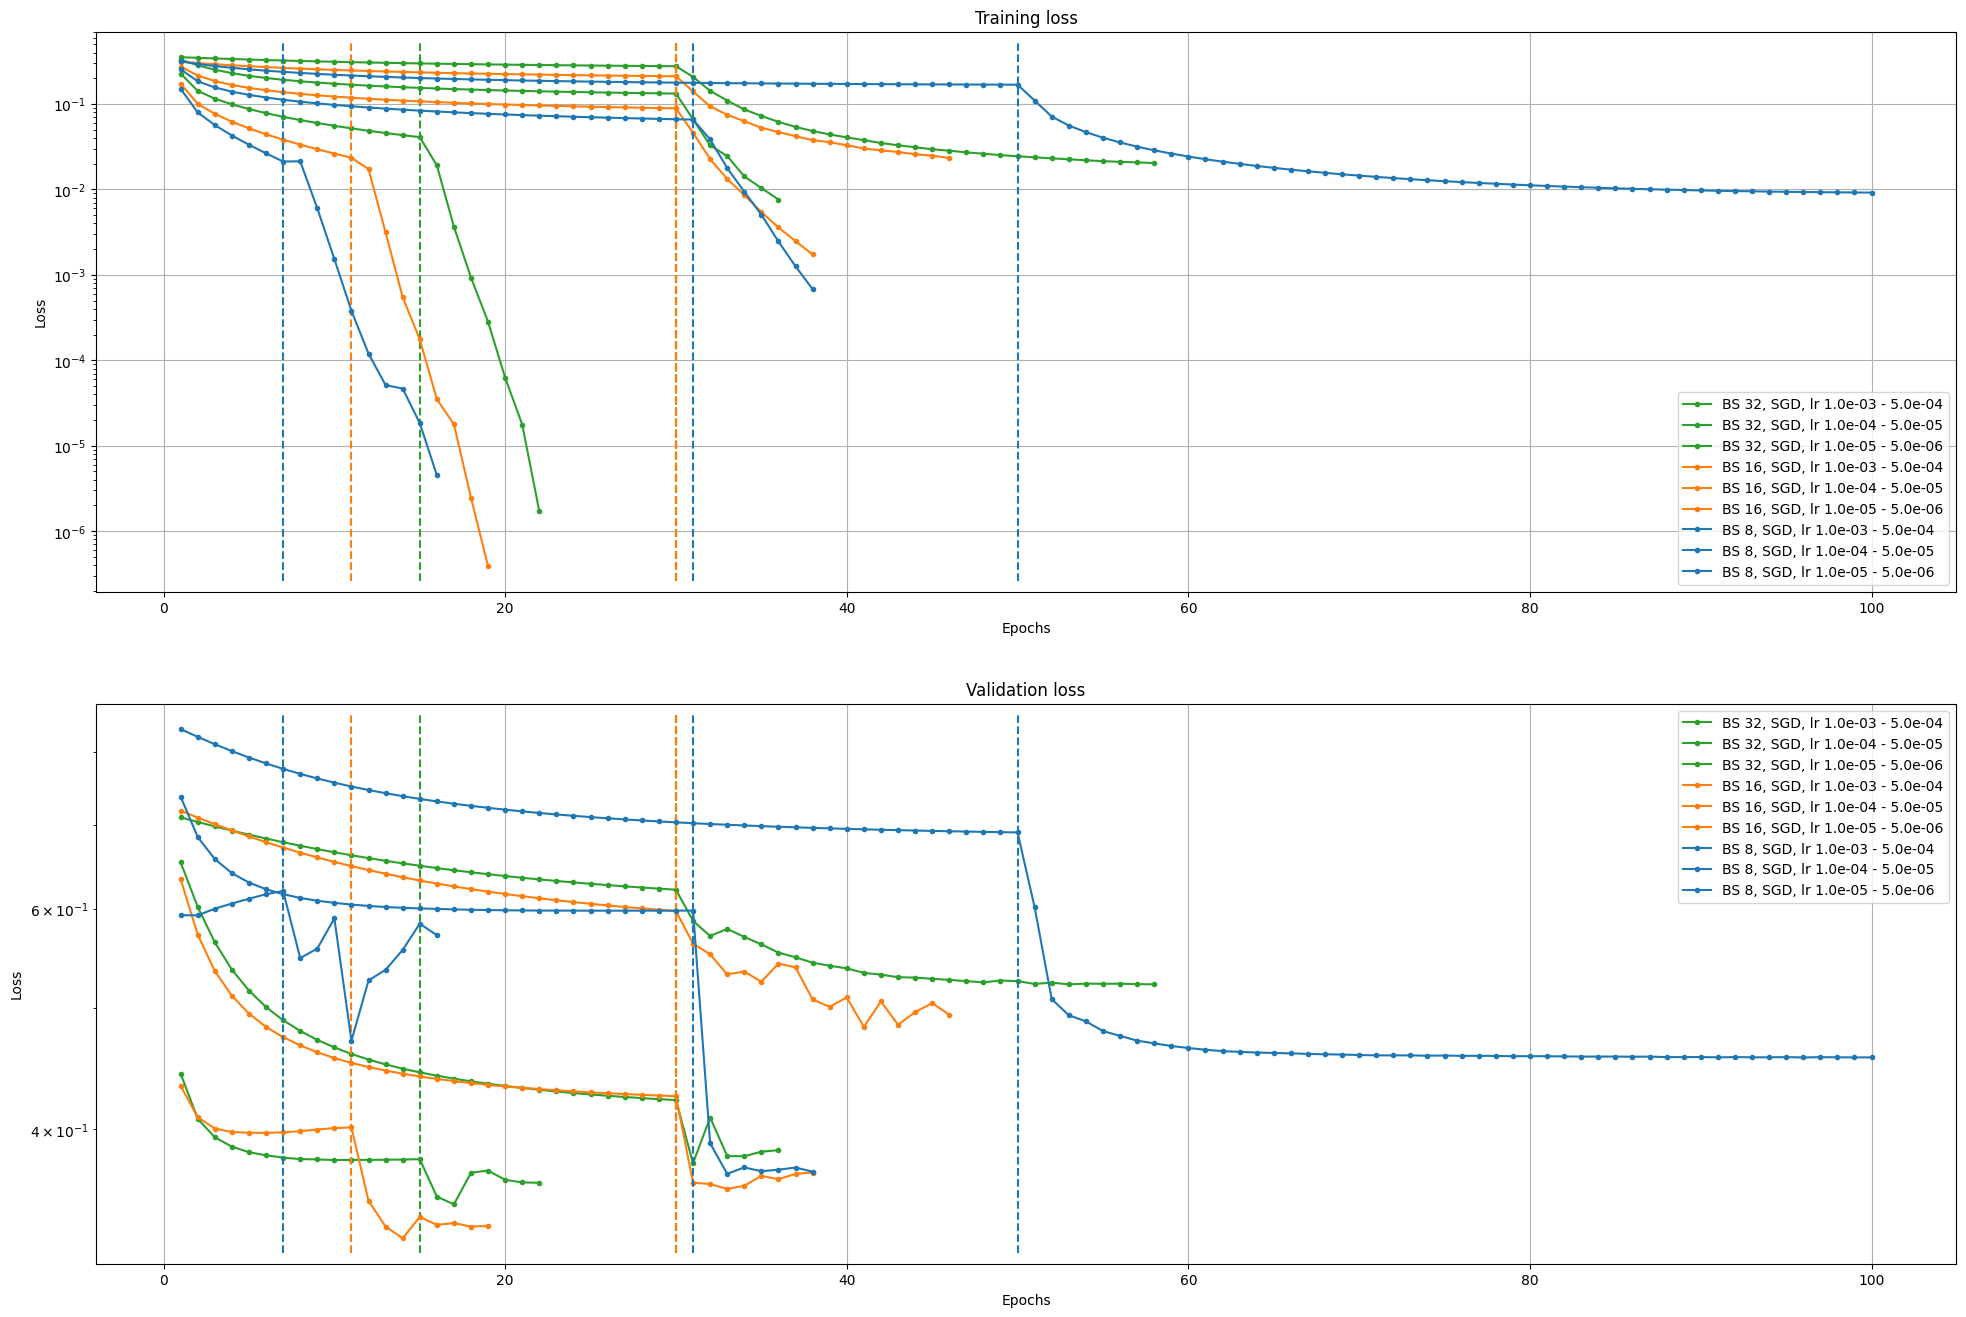

In [21]:
fig, axs = plt.subplots(figsize=(24, 16), nrows=2)

cmap = mpl.colormaps["tab10"]
color_list = [cmap(x) for x in np.linspace(0, 1, 10)]

for train_data_idx, train_data in enumerate(train_data_list):

    exp_name = "BS {:d}, {:s}, lr {:.1e} - {:.1e}".format(
        train_data["settings"]["data_loading"]["batch_size"],
        train_data["settings"]["stage_1"]["optimizer"]["class"],
        train_data["settings"]["stage_1"]["optimizer"]["lr"],
        train_data["settings"]["stage_2"]["optimizer"]["lr"]
    )

    mean_train_loss_list =\
        train_data["results"]["stage_1"]["mean_train_loss_list"] +\
        train_data["results"]["stage_2"]["mean_train_loss_list"]

    mean_val_loss_list =\
        train_data["results"]["stage_1"]["mean_val_loss_list"] +\
        train_data["results"]["stage_2"]["mean_val_loss_list"]
    
    stage_1_epochs = train_data["results"]["stage_1"]["num_epochs"]

    if train_data["settings"]["data_loading"]["batch_size"] == 8:
        color = color_list[0]
    if train_data["settings"]["data_loading"]["batch_size"] == 16:
        color = color_list[1]
    if train_data["settings"]["data_loading"]["batch_size"] == 32:
        color = color_list[2]

    axs[0].plot(range(1, len(mean_train_loss_list) + 1), mean_train_loss_list, label=exp_name, color=color, marker=".")
    axs[1].plot(range(1, len(mean_val_loss_list) + 1), mean_val_loss_list, label=exp_name, color=color, marker=".")

    axs[0].axvline(stage_1_epochs, ymin=0.02, ymax=0.98, color=color, linestyle="--")
    axs[1].axvline(stage_1_epochs, ymin=0.02, ymax=0.98, color=color, linestyle="--")

for ax in axs:

    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")

    ax.set_yscale("log")

    ax.grid()
    ax.legend()

axs[0].set_title("Training loss")
axs[1].set_title("Validation loss")

plt.show()

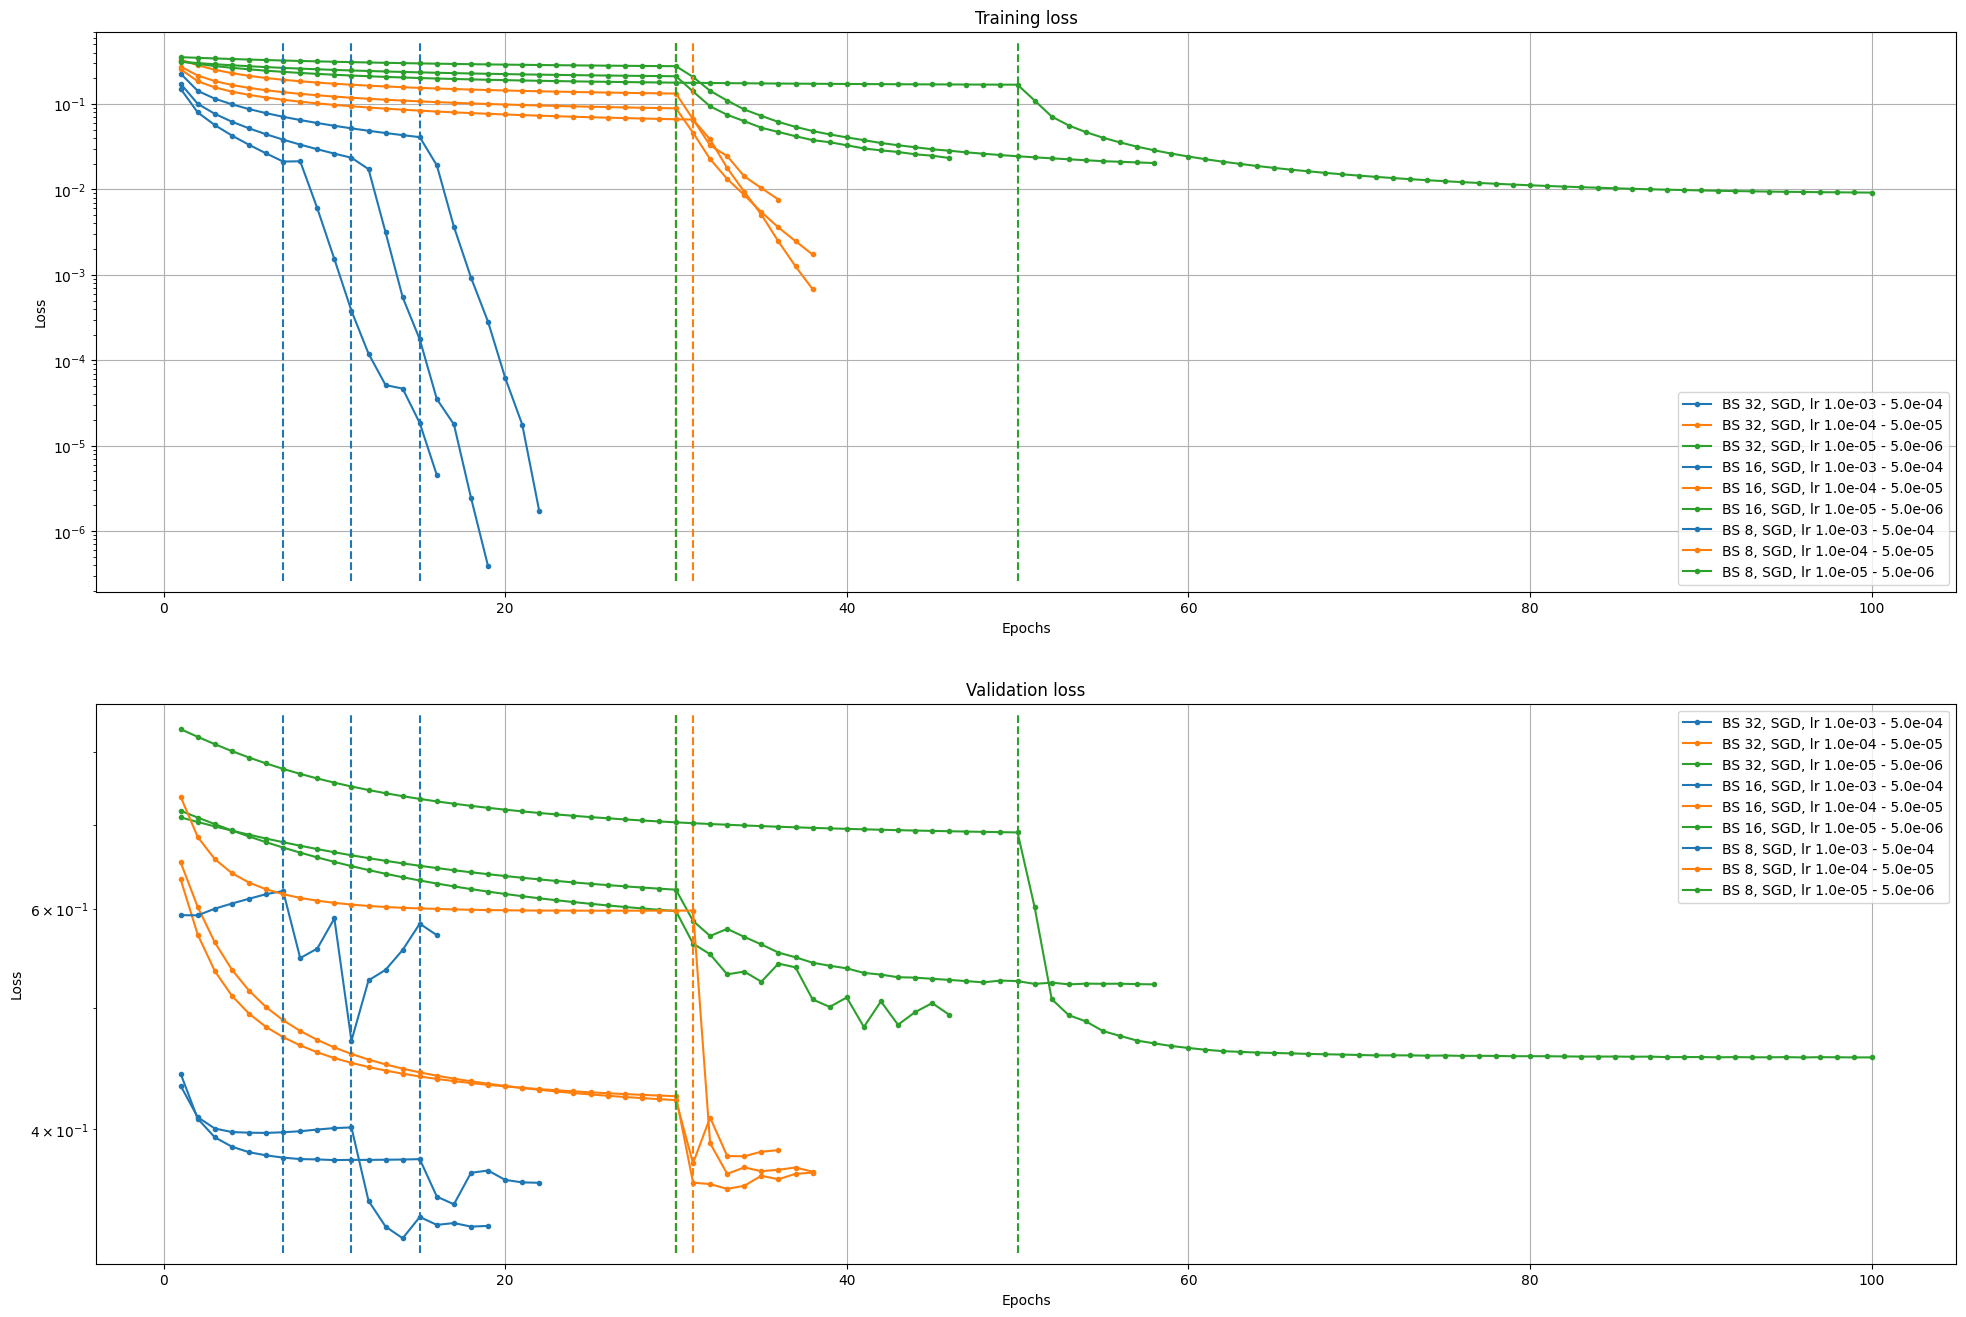

In [22]:
fig, axs = plt.subplots(figsize=(24, 16), nrows=2)

cmap = mpl.colormaps["tab10"]
color_list = [cmap(x) for x in np.linspace(0, 1, 10)]

for train_data_idx, train_data in enumerate(train_data_list):

    exp_name = "BS {:d}, {:s}, lr {:.1e} - {:.1e}".format(
        train_data["settings"]["data_loading"]["batch_size"],
        train_data["settings"]["stage_1"]["optimizer"]["class"],
        train_data["settings"]["stage_1"]["optimizer"]["lr"],
        train_data["settings"]["stage_2"]["optimizer"]["lr"]
    )

    mean_train_loss_list =\
        train_data["results"]["stage_1"]["mean_train_loss_list"] +\
        train_data["results"]["stage_2"]["mean_train_loss_list"]

    mean_val_loss_list =\
        train_data["results"]["stage_1"]["mean_val_loss_list"] +\
        train_data["results"]["stage_2"]["mean_val_loss_list"]
    
    stage_1_epochs = train_data["results"]["stage_1"]["num_epochs"]

    if train_data["settings"]["stage_1"]["optimizer"]["lr"] == 1e-3:
        color = color_list[0]
    if train_data["settings"]["stage_1"]["optimizer"]["lr"] == 1e-4:
        color = color_list[1]
    if train_data["settings"]["stage_1"]["optimizer"]["lr"] == 1e-5:
        color = color_list[2]

    axs[0].plot(range(1, len(mean_train_loss_list) + 1), mean_train_loss_list, label=exp_name, color=color, marker=".")
    axs[1].plot(range(1, len(mean_val_loss_list) + 1), mean_val_loss_list, label=exp_name, color=color, marker=".")

    axs[0].axvline(stage_1_epochs, ymin=0.02, ymax=0.98, color=color, linestyle="--")
    axs[1].axvline(stage_1_epochs, ymin=0.02, ymax=0.98, color=color, linestyle="--")

for ax in axs:

    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")

    ax.set_yscale("log")

    ax.grid()
    ax.legend()

axs[0].set_title("Training loss")
axs[1].set_title("Validation loss")

plt.show()

---

In [7]:
batch_size_list = []
optimizer_name_list = []
learning_rate_list = []

test_loss_list = []

lr_map = {
    1e-5: "Low",
    1e-4: "Med",
    1e-3: "High"
}

for train_data_idx, train_data in enumerate(train_data_list):

    batch_size_list.append(train_data["settings"]["data_loading"]["batch_size"])
    optimizer_name_list.append(train_data["settings"]["stage_1"]["optimizer"]["class"])
    learning_rate_list.append(lr_map[train_data["settings"]["stage_1"]["optimizer"]["lr"]])

    test_loss_list.append(train_data["results"]["test"]["mean_test_loss"])

In [8]:
results = pd.DataFrame({
    "batch_size": batch_size_list,
    "optimizer": optimizer_name_list,
    "learning_rate": learning_rate_list,
    "test_loss": test_loss_list
    })

In [9]:
results.sort_values("test_loss")

,batch_size,optimizer,learning_rate,test_loss
3,16,SGD,High,0.154624
0,32,SGD,High,0.165451
4,16,SGD,Med,0.168113
1,32,SGD,Med,0.176092
7,8,SGD,Med,0.177006
8,8,SGD,Low,0.218711
6,8,SGD,High,0.220038
5,16,SGD,Low,0.230082
2,32,SGD,Low,0.246735


In [10]:
train_epoch_time_list_2 = []
val_epoch_time_list_2 = []

total_epoch_time_list_2 = []
total_epoch_time_list_acc_2 = []

stage_1_epochs_list = []

for train_data in train_data_list:

    train_epoch_time_list =\
        train_data["results"]["stage_1"]["train_epoch_time_list"] +\
        train_data["results"]["stage_2"]["train_epoch_time_list"]

    val_epoch_time_list =\
        train_data["results"]["stage_1"]["val_epoch_time_list"] +\
        train_data["results"]["stage_2"]["val_epoch_time_list"]

    total_epoch_time_list = np.asarray(train_epoch_time_list) + np.asarray(val_epoch_time_list)
    total_epoch_time_list_acc = np.cumsum(total_epoch_time_list)

    stage_1_epochs = train_data["results"]["stage_1"]["num_epochs"]

    #

    train_epoch_time_list_2.append(train_epoch_time_list)
    val_epoch_time_list_2.append(val_epoch_time_list)

    total_epoch_time_list_2.append(total_epoch_time_list)
    total_epoch_time_list_acc_2.append(total_epoch_time_list_acc)

    stage_1_epochs_list.append(stage_1_epochs)

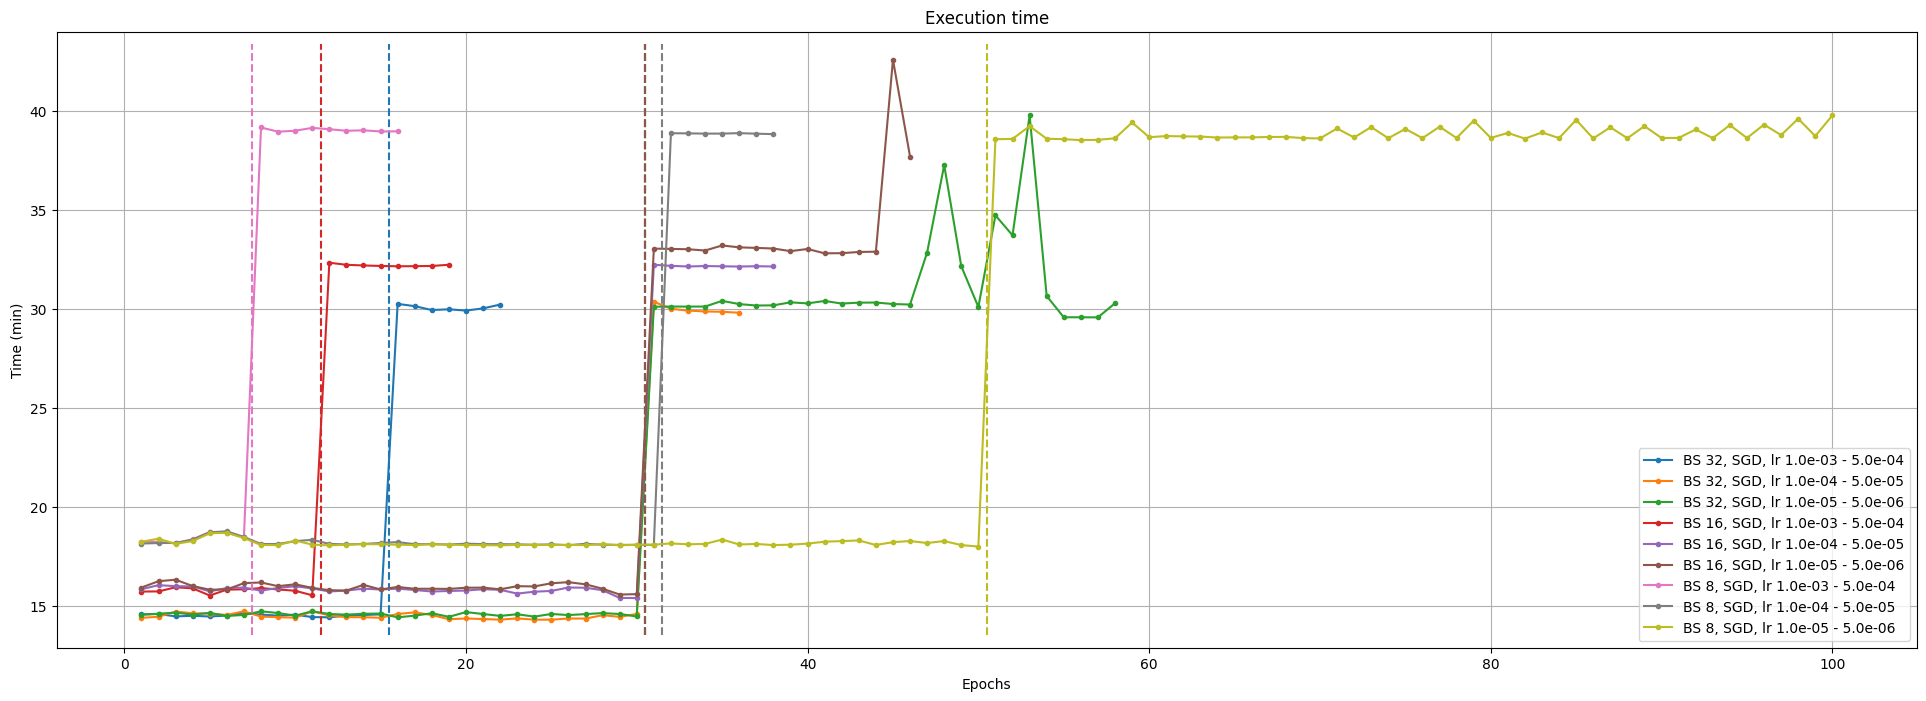

In [18]:
plt.figure(figsize=(24, 8))

cmap = mpl.colormaps["tab10"]
color_list = [cmap(x) for x in np.linspace(0, 1, 10)]

for train_data_idx, train_data in enumerate(train_data_list):

    exp_name = "BS {:d}, {:s}, lr {:.1e} - {:.1e}".format(
        train_data["settings"]["data_loading"]["batch_size"],
        train_data["settings"]["stage_1"]["optimizer"]["class"],
        train_data["settings"]["stage_1"]["optimizer"]["lr"],
        train_data["settings"]["stage_2"]["optimizer"]["lr"]
    )

    train_epoch_time_list =\
        train_data["results"]["stage_1"]["train_epoch_time_list"] +\
        train_data["results"]["stage_2"]["train_epoch_time_list"]

    val_epoch_time_list =\
        train_data["results"]["stage_1"]["val_epoch_time_list"] +\
        train_data["results"]["stage_2"]["val_epoch_time_list"]

    total_epoch_time_list = np.asarray(train_epoch_time_list) + np.asarray(val_epoch_time_list)
    total_epoch_time_list_acc = np.cumsum(total_epoch_time_list)

    stage_1_epochs = train_data["results"]["stage_1"]["num_epochs"]

    #

    color = color_list[train_data_idx]

    plt.plot(range(1, len(total_epoch_time_list) + 1), total_epoch_time_list / 60, marker=".", label=exp_name, color=color)
    #plt.yscale("log")

    plt.axvline(stage_1_epochs + 0.5, ymin=0.02, ymax=0.98, color=color, linestyle="--")

plt.title("Execution time")

plt.xlabel("Epochs")
plt.ylabel("Time (min)")

plt.legend()

plt.grid()

plt.show()

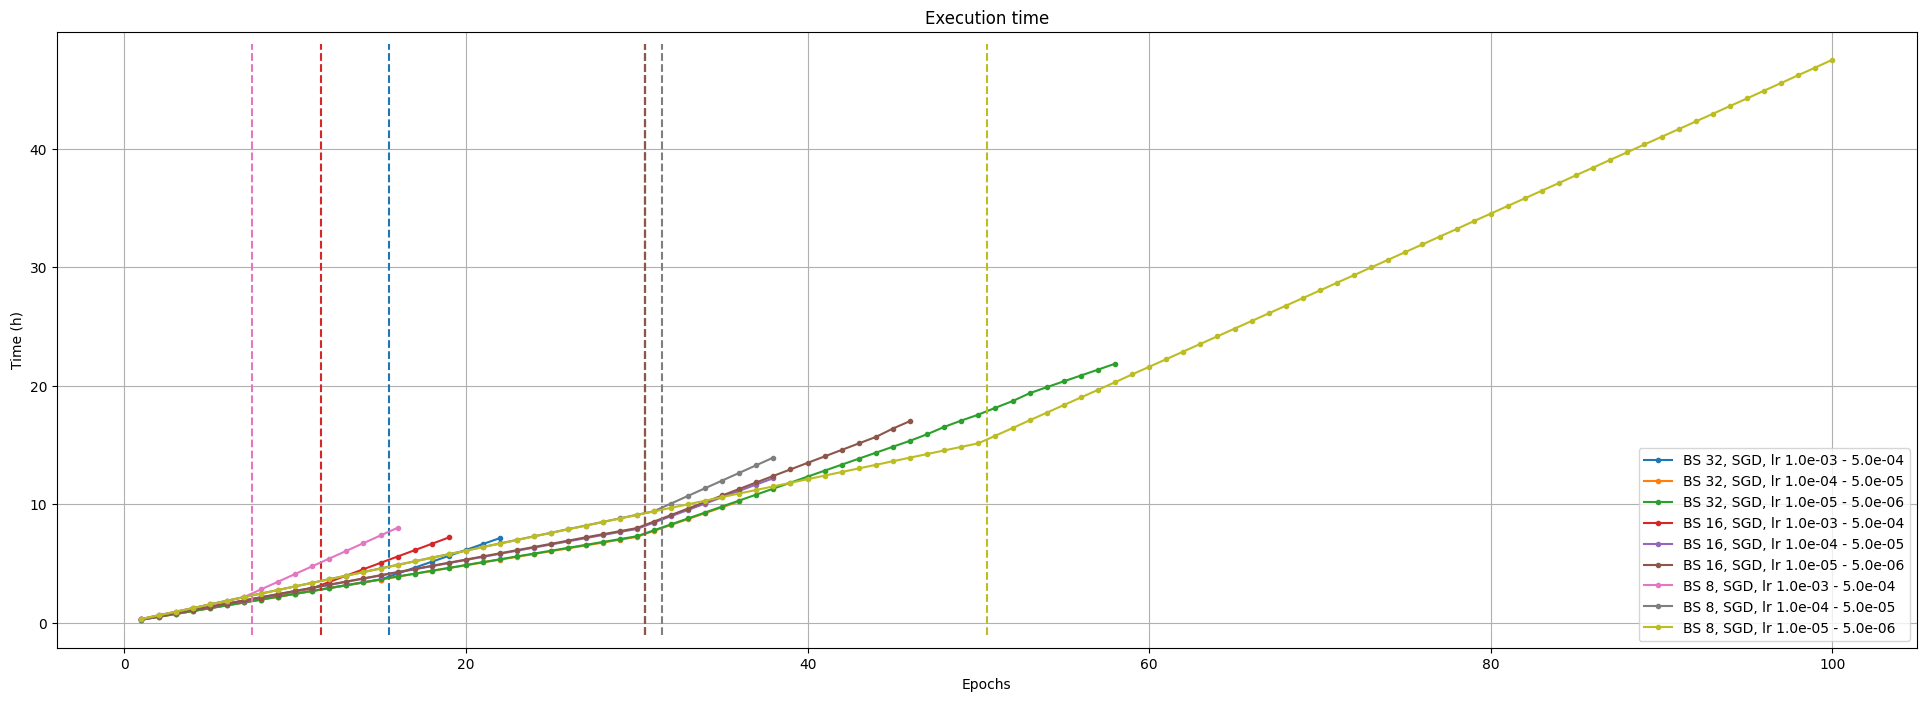

In [19]:
plt.figure(figsize=(24, 8))

cmap = mpl.colormaps["tab10"]
color_list = [cmap(x) for x in np.linspace(0, 1, 10)]

for train_data_idx, train_data in enumerate(train_data_list):

    exp_name = "BS {:d}, {:s}, lr {:.1e} - {:.1e}".format(
        train_data["settings"]["data_loading"]["batch_size"],
        train_data["settings"]["stage_1"]["optimizer"]["class"],
        train_data["settings"]["stage_1"]["optimizer"]["lr"],
        train_data["settings"]["stage_2"]["optimizer"]["lr"]
    )

    train_epoch_time_list =\
        train_data["results"]["stage_1"]["train_epoch_time_list"] +\
        train_data["results"]["stage_2"]["train_epoch_time_list"]

    val_epoch_time_list =\
        train_data["results"]["stage_1"]["val_epoch_time_list"] +\
        train_data["results"]["stage_2"]["val_epoch_time_list"]

    total_epoch_time_list = np.asarray(train_epoch_time_list) + np.asarray(val_epoch_time_list)
    total_epoch_time_list_acc = np.cumsum(total_epoch_time_list)

    stage_1_epochs = train_data["results"]["stage_1"]["num_epochs"]

    #

    color = color_list[train_data_idx]

    plt.plot(range(1, len(total_epoch_time_list_acc) + 1), total_epoch_time_list_acc / 3600, marker=".", label=exp_name, color=color)
    #plt.yscale("log")

    plt.axvline(stage_1_epochs + 0.5, ymin=0.02, ymax=0.98, color=color, linestyle="--")

plt.title("Execution time")

plt.xlabel("Epochs")
plt.ylabel("Time (h)")

plt.legend()

plt.grid()

plt.show()

In [13]:
total_stage_1_time =\
    sum(train_data["results"]["stage_1"]["train_epoch_time_list"]) +\
    sum(train_data["results"]["stage_1"]["val_epoch_time_list"])

total_stage_2_time =\
    sum(train_data["results"]["stage_2"]["train_epoch_time_list"]) +\
    sum(train_data["results"]["stage_2"]["val_epoch_time_list"])

stage_1_epochs = train_data["results"]["stage_1"]["num_epochs"]
mean_stage_1_epoch_time = total_stage_1_time / stage_1_epochs

stage_2_epochs = train_data["results"]["stage_2"]["num_epochs"]
mean_stage_2_epoch_time = total_stage_2_time / stage_2_epochs

total_epoch_time = total_stage_1_time + total_stage_2_time

In [14]:
print("Total Stage 1 Time:      {:s}".format(utils.time.sprint_fancy_time_diff(total_stage_1_time)))
print("Total Stage 2 Time:      {:s}".format(utils.time.sprint_fancy_time_diff(total_stage_2_time)))
print("Mean Stage 1 Epoch Time: {:s}".format(utils.time.sprint_fancy_time_diff(mean_stage_1_epoch_time)))
print("Mean Stage 2 Epoch Time: {:s}".format(utils.time.sprint_fancy_time_diff(mean_stage_2_epoch_time)))
print("Total Epoch Time:        {:s}".format(utils.time.sprint_fancy_time_diff(total_epoch_time)))

Total Stage 1 Time:      15:07:56.421
Total Stage 2 Time:      32:22:59.324
Mean Stage 1 Epoch Time: 0:18:09.528
Mean Stage 2 Epoch Time: 0:38:51.586
Total Epoch Time:        47:30:55.745
